### Loading the data

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the Diabetes dataset
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Custom vs Scikit-Learn: Decision Tree Regressor


In [5]:
from supervised_learning.regression.DecisionTreeRegressor import DecisionTreeRegressor  # Assuming custom implementation
from sklearn.tree import DecisionTreeRegressor as SklearnDecisionTreeRegressor

# Custom Decision Tree Regressor
custom_dtr = DecisionTreeRegressor(max_depth=5)
custom_dtr.fit(X_train, y_train)
custom_dtr_predictions = custom_dtr.predict(X_test)
custom_dtr_mse = mean_squared_error(y_test, custom_dtr_predictions)

# Scikit-Learn Decision Tree Regressor
sklearn_dtr = SklearnDecisionTreeRegressor(max_depth=5, random_state=42)
sklearn_dtr.fit(X_train, y_train)
sklearn_dtr_predictions = sklearn_dtr.predict(X_test)
sklearn_dtr_mse = mean_squared_error(y_test, sklearn_dtr_predictions)

print(f"Custom Decision Tree Regressor MSE: {custom_dtr_mse}")
print(f"Scikit-Learn Decision Tree Regressor MSE: {sklearn_dtr_mse}")

Custom Decision Tree Regressor MSE: 4234.581816017141
Scikit-Learn Decision Tree Regressor MSE: 3818.0714941788437


### Custom vs Scikit-Learn: Random Forest Regressor


In [9]:
from ensemble.RandomForestRegressor import RandomForestRegressor  # Assuming custom implementation
from sklearn.ensemble import RandomForestRegressor as SklearnRandomForestRegressor

# Custom Random Forest Regressor
custom_rfr = RandomForestRegressor(n_estimators=100, max_depth=5)
custom_rfr.fit(X_train, y_train)
custom_rfr_predictions = custom_rfr.predict(X_test)
custom_rfr_mse = mean_squared_error(y_test, custom_rfr_predictions)

# Scikit-Learn Random Forest Regressor
sklearn_rfr = SklearnRandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
sklearn_rfr.fit(X_train, y_train)
sklearn_rfr_predictions = sklearn_rfr.predict(X_test)
sklearn_rfr_mse = mean_squared_error(y_test, sklearn_rfr_predictions)

print(f"Custom Decision Tree Regressor MSE: {custom_rfr_mse}")
print(f"Scikit-Learn Decision Tree Regressor MSE: {sklearn_rfr_mse}")

Custom Decision Tree Regressor MSE: 2797.0712941021197
Scikit-Learn Decision Tree Regressor MSE: 2768.904102714224


### Custom vs Scikit-Learn: Linear Regression


In [10]:
from supervised_learning.regression.LinearRegression import LinearRegression  # Assuming custom implementation
from sklearn.linear_model import LinearRegression as SklearnLinearRegression

# Custom Linear Regression
custom_lr = LinearRegression()
custom_lr.fit(X_train, y_train)
custom_lr_predictions = custom_lr.predict(X_test)
custom_lr_mse = mean_squared_error(y_test, custom_lr_predictions)

# Scikit-Learn Linear Regression
sklearn_lr = SklearnLinearRegression()
sklearn_lr.fit(X_train, y_train)
sklearn_lr_predictions = sklearn_lr.predict(X_test)
sklearn_lr_mse = mean_squared_error(y_test, sklearn_lr_predictions)

print(f"Custom Decision Tree Regressor MSE: {custom_lr_mse}")
print(f"Scikit-Learn Decision Tree Regressor MSE: {sklearn_lr_mse}")

Custom Decision Tree Regressor MSE: 2821.7509810013094
Scikit-Learn Decision Tree Regressor MSE: 2821.7509810013103


### Custom vs Scikit-Learn: MLP Regressor


In [14]:
from neural_networks.MLPRegressor import MLPRegressor  
from sklearn.neural_network import MLPRegressor as SklearnMLPRegressor

# Custom MLP Regressor
custom_mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', learning_rate=0.001, max_iter=500)
custom_mlp.fit(X_train, y_train.reshape(-1, 1))
predictions_custom = custom_mlp.predict(X_test).flatten()

# Scikit-Learn MLPRegressor
sklearn_mlp = SklearnMLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', learning_rate_init=0.001, max_iter=500, random_state=42)
sklearn_mlp.fit(X_train, y_train)
predictions_sklearn = sklearn_mlp.predict(X_test)

# Evaluate models
mse_custom = mean_squared_error(y_test, predictions_custom)
mse_sklearn = mean_squared_error(y_test, predictions_sklearn)

print(f"Custom MLPRegressor MSE: {mse_custom}")
print(f"Scikit-Learn MLPRegressor MSE: {mse_sklearn}")


Custom MLPRegressor MSE: 3278.602816974303
Scikit-Learn MLPRegressor MSE: 2898.272499010286


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


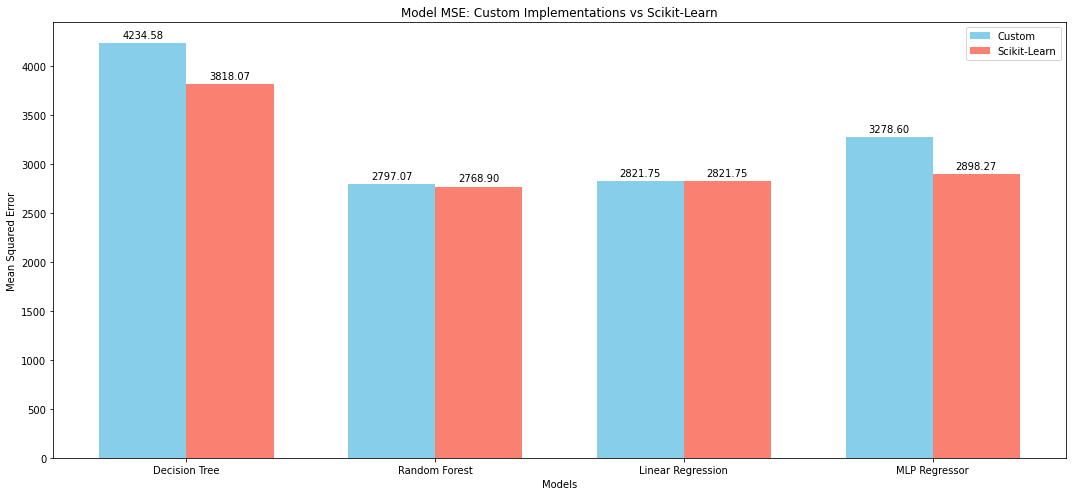

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
models = ['Decision Tree', 'Random Forest', 'Linear Regression', 'MLP Regressor']
custom_mse = [custom_dtr_mse, custom_rfr_mse, custom_lr_mse, mse_custom]
sklearn_mse = [sklearn_dtr_mse, sklearn_rfr_mse, sklearn_lr_mse, mse_sklearn]

# Plotting
fig, ax = plt.subplots(figsize=(15, 7))
width = 0.35  # the width of the bars

x = np.arange(len(models))
rects1 = ax.bar(x - width/2, custom_mse, width, label='Custom', color='skyblue')
rects2 = ax.bar(x + width/2, sklearn_mse, width, label='Scikit-Learn', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Model MSE: Custom Implementations vs Scikit-Learn')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Adding MSE values on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

plt.show()
